<a href="https://colab.research.google.com/github/ANDYTIEN1/ultralytics/blob/main/ME1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

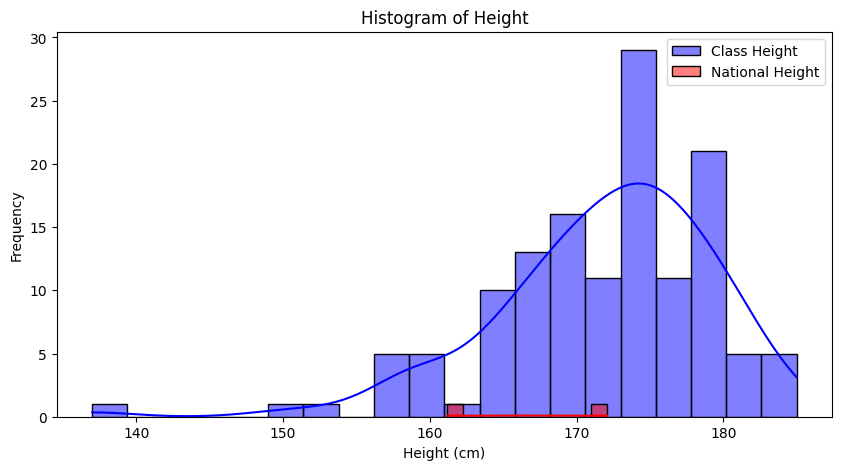

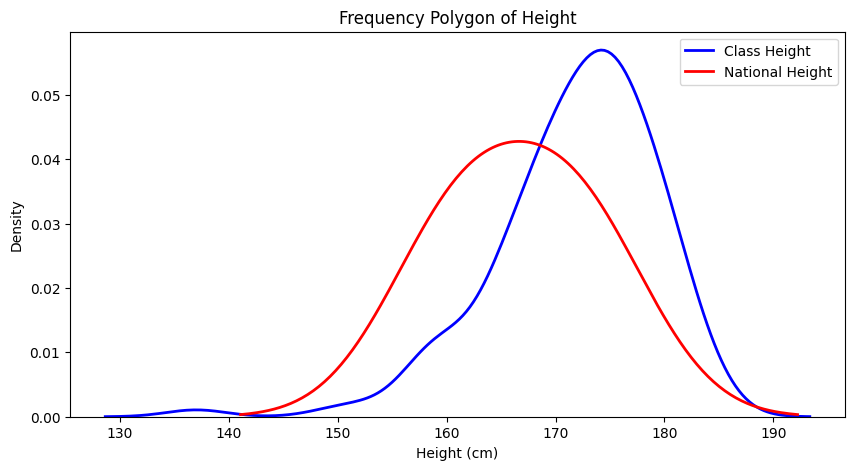

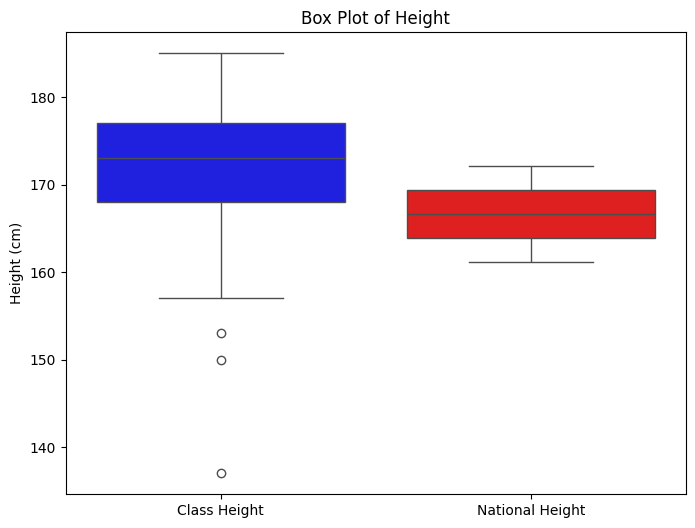

<ipython-input-11-e1f26082175b>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Class Height', 'National Height'], y=[stats.skew(df_hw['Height (cm)']), stats.skew(df_height_fixed['Height (cm) (Mean)'])], palette=['blue', 'red'])


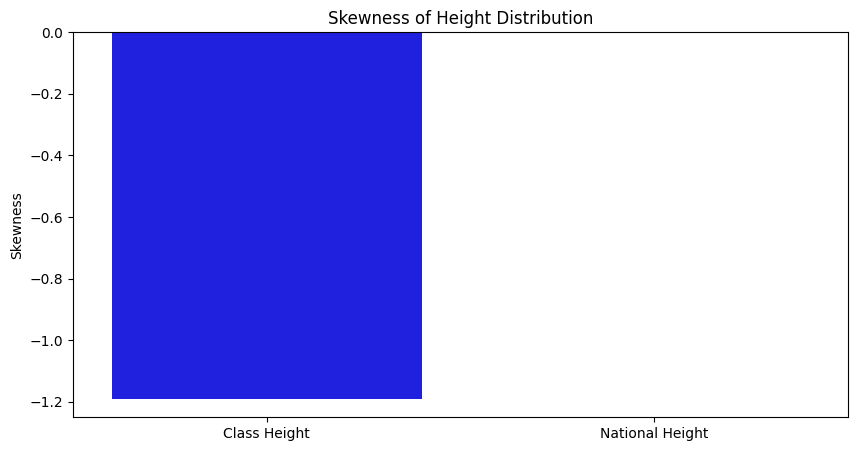

<ipython-input-11-e1f26082175b>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Class Height', 'National Height'], y=[np.std(df_hw['Height (cm)']), np.std(df_height_fixed['Height (cm) (Mean)'])], palette=['blue', 'red'])


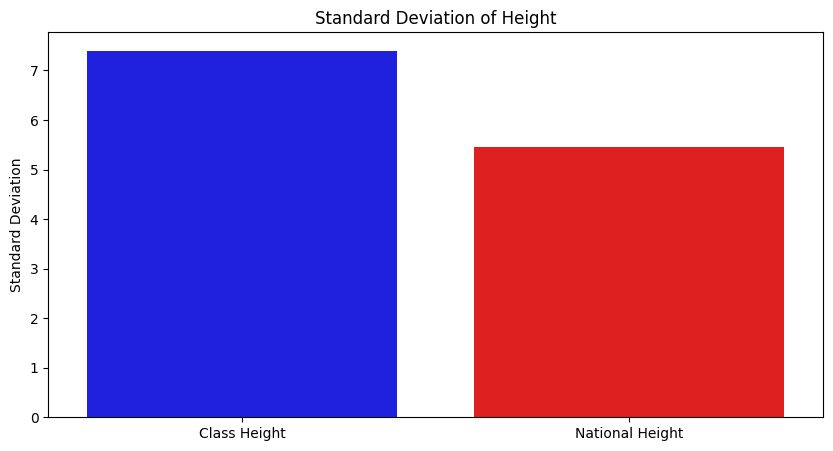

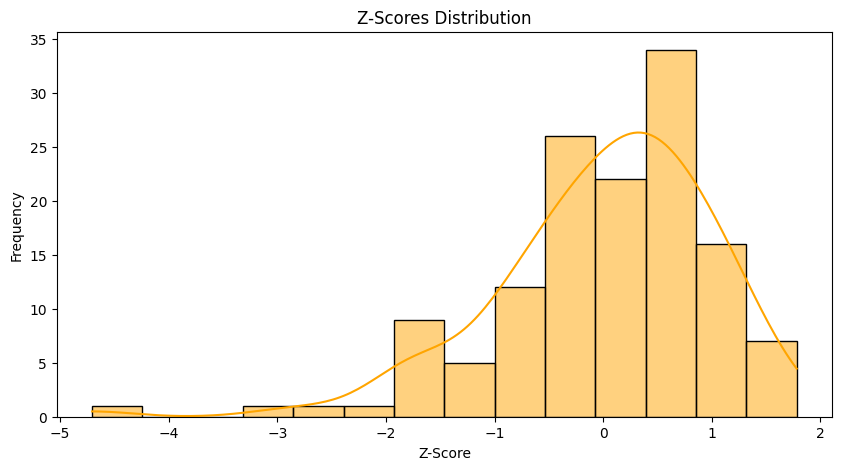

<ipython-input-11-e1f26082175b>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['T-Statistic', 'P-Value'], y=ttest_ind(df_hw['Height (cm)'], df_height_fixed['Height (cm) (Mean)'], equal_var=False), palette=['purple', 'cyan'])


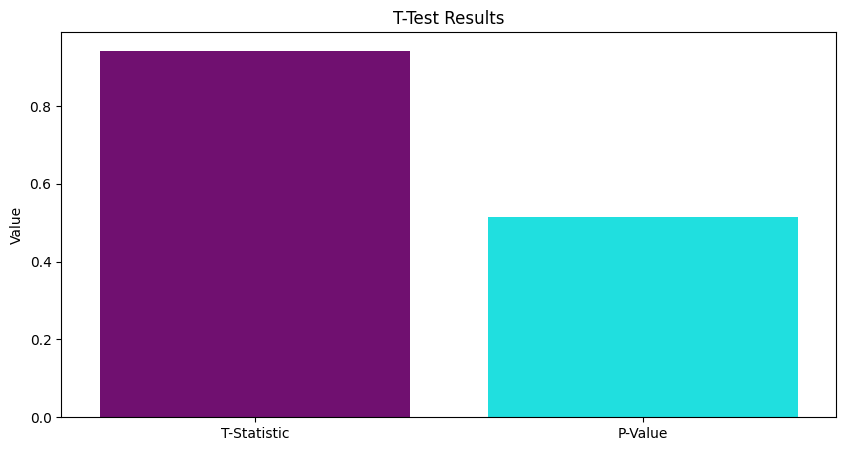

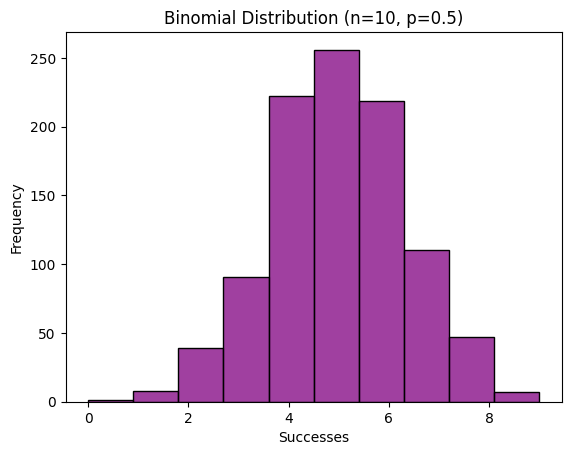

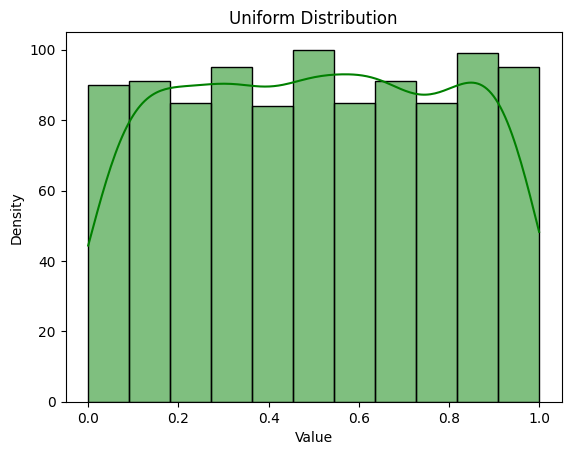

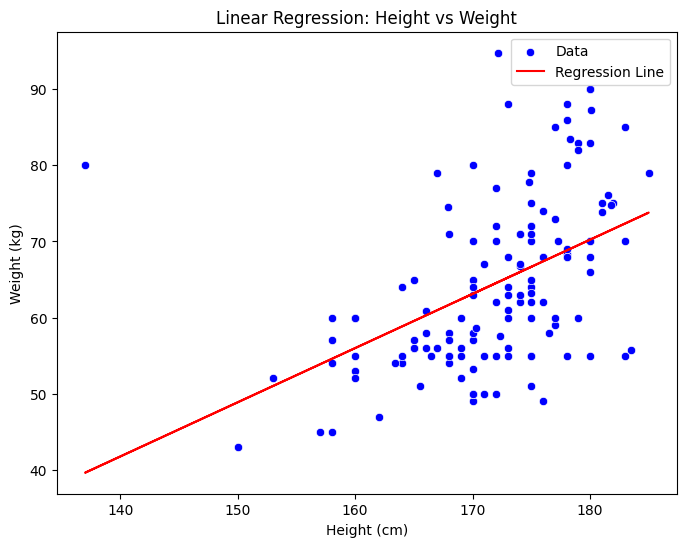

<ipython-input-11-e1f26082175b>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Coefficient', 'Intercept'], y=[model.coef_[0], model.intercept_], palette=['blue', 'red'])


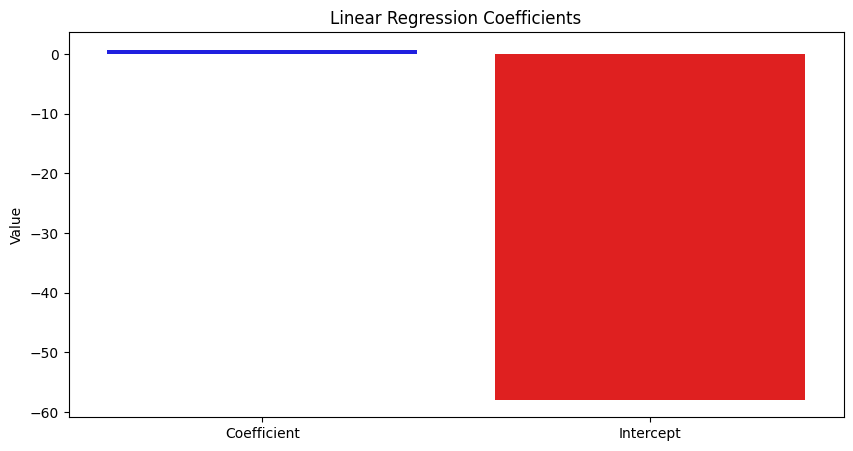

<ipython-input-11-e1f26082175b>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['T-Statistic', 'P-Value'], y=[stat, p_value], palette=['purple', 'cyan'])


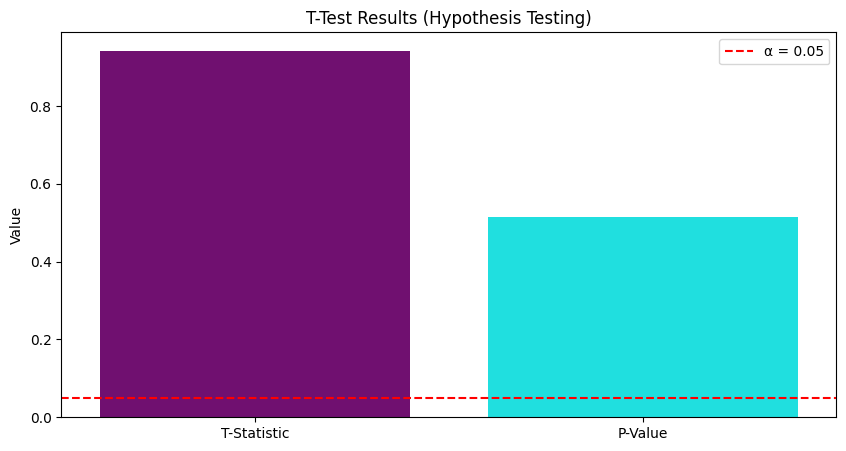

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom, uniform, ttest_ind
from sklearn.linear_model import LinearRegression

# 讀取資料
file_hw = "/content/H_W (3) (1).csv"
file_height_fixed = "/content/身高_修正 (1).csv"

df_hw = pd.read_csv(file_hw, sep=";")
df_height_fixed = pd.read_csv(file_height_fixed, skiprows=1)

# 整理資料
df_height_fixed.columns = ["Sex", "Age", "Sample Size", "Height (cm) (Mean)", "Height (cm) (SE)",
                           "Weight (kg) (Mean)", "Weight (kg) (SE)", "BMI (Mean)", "BMI (SE)"]
df_height_fixed = df_height_fixed[df_height_fixed["Age"] == 18]

# 直方圖: 班級與全國身高分佈
plt.figure(figsize=(10,5))
sns.histplot(df_hw['Height (cm)'], kde=True, bins=20, color='blue', label='Class Height')
sns.histplot(df_height_fixed['Height (cm) (Mean)'], kde=True, bins=10, color='red', label='National Height')
plt.legend()
plt.title("Histogram of Height")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()

# 頻率多邊形: KDE 分佈
plt.figure(figsize=(10,5))
sns.kdeplot(df_hw['Height (cm)'], color='blue', label='Class Height', linewidth=2)
sns.kdeplot(df_height_fixed['Height (cm) (Mean)'], color='red', label='National Height', linewidth=2)
plt.legend()
plt.title("Frequency Polygon of Height")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.show()

# 箱型圖: 身高分佈比較
plt.figure(figsize=(8,6))
sns.boxplot(data=[df_hw['Height (cm)'], df_height_fixed['Height (cm) (Mean)']], palette=['blue', 'red'])
plt.xticks([0,1], ['Class Height', 'National Height'])
plt.title("Box Plot of Height")
plt.ylabel("Height (cm)")
plt.show()

# 偏態分析
plt.figure(figsize=(10,5))
sns.barplot(x=['Class Height', 'National Height'], y=[stats.skew(df_hw['Height (cm)']), stats.skew(df_height_fixed['Height (cm) (Mean)'])], palette=['blue', 'red'])
plt.title("Skewness of Height Distribution")
plt.ylabel("Skewness")
plt.show()

# 標準差分析
plt.figure(figsize=(10,5))
sns.barplot(x=['Class Height', 'National Height'], y=[np.std(df_hw['Height (cm)']), np.std(df_height_fixed['Height (cm) (Mean)'])], palette=['blue', 'red'])
plt.title("Standard Deviation of Height")
plt.ylabel("Standard Deviation")
plt.show()

# Z 分數分佈
plt.figure(figsize=(10,5))
sns.histplot((df_hw['Height (cm)'] - np.mean(df_hw['Height (cm)'])) / np.std(df_hw['Height (cm)']), kde=True, color='orange')
plt.title("Z-Scores Distribution")
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.show()

# t 檢定結果
plt.figure(figsize=(10,5))
sns.barplot(x=['T-Statistic', 'P-Value'], y=ttest_ind(df_hw['Height (cm)'], df_height_fixed['Height (cm) (Mean)'], equal_var=False), palette=['purple', 'cyan'])
plt.title("T-Test Results")
plt.ylabel("Value")
plt.show()

# 二項分佈範例
n, p = 10, 0.5
binom_rv = binom.rvs(n, p, size=1000)
sns.histplot(binom_rv, kde=False, bins=10, color='purple')
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Successes")
plt.ylabel("Frequency")
plt.show()

# 均勻分佈範例
uniform_rv = uniform.rvs(size=1000)
sns.histplot(uniform_rv, kde=True, color='green')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# 線性回歸分析
X = df_hw[['Height (cm)']]
y = df_hw['Weight (kg)']
model = LinearRegression()
model.fit(X, y)

# 繪製線性回歸圖
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_hw['Height (cm)'], y=df_hw['Weight (kg)'], color='blue', label='Data')
plt.plot(df_hw['Height (cm)'], model.predict(X), color='red', label='Regression Line')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression: Height vs Weight")
plt.legend()
plt.show()

# 顯示線性回歸係數與截距
plt.figure(figsize=(10,5))
sns.barplot(x=['Coefficient', 'Intercept'], y=[model.coef_[0], model.intercept_], palette=['blue', 'red'])
plt.title("Linear Regression Coefficients")
plt.ylabel("Value")
plt.show()

# 假設檢定: t 檢定
alpha = 0.05
stat, p_value = ttest_ind(df_hw['Height (cm)'], df_height_fixed['Height (cm) (Mean)'], equal_var=False)

plt.figure(figsize=(10,5))
sns.barplot(x=['T-Statistic', 'P-Value'], y=[stat, p_value], palette=['purple', 'cyan'])
plt.axhline(y=alpha, color='red', linestyle='--', label=f'α = {alpha}')
plt.legend()
plt.title("T-Test Results (Hypothesis Testing)")
plt.ylabel("Value")
plt.show()

